In [39]:
import pandas as pd
import csv, sqlite3 
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [3]:
df = pd.read_csv('arxiv_ai.csv')

In [4]:
df.head()

,authors,categories,comment,doi,entry_id,journal_ref,pdf_url,primary_category,published,summary,title,updated
0,[arxiv.Result.Author('M. L. Ginsberg')],['cs.AI'],See http://www.jair.org/ for an online appendi...,NaN,http://arxiv.org/abs/cs/9308101v1,"Journal of Artificial Intelligence Research, V...",http://arxiv.org/pdf/cs/9308101v1,cs.AI,1993-08-01 00:00:00+00:00,Because of their occasional need to return to ...,Dynamic Backtracking,1993-08-01 00:00:00+00:00
1,[arxiv.Result.Author('M. P. Wellman')],['cs.AI'],See http://www.jair.org/ for any accompanying ...,NaN,http://arxiv.org/abs/cs/9308102v1,"Journal of Artificial Intelligence Research, V...",http://arxiv.org/pdf/cs/9308102v1,cs.AI,1993-08-01 00:00:00+00:00,Market price systems constitute a well-underst...,A Market-Oriented Programming Environment and ...,1993-08-01 00:00:00+00:00
2,"[arxiv.Result.Author('I. P. Gent'), arxiv.Resu...",['cs.AI'],See http://www.jair.org/ for any accompanying ...,NaN,http://arxiv.org/abs/cs/9309101v1,"Journal of Artificial Intelligence Research, V...",http://arxiv.org/pdf/cs/9309101v1,cs.AI,1993-09-01 00:00:00+00:00,We describe an extensive study of search in GS...,An Empirical Analysis of Search in GSAT,1993-09-01 00:00:00+00:00
3,"[arxiv.Result.Author('F. Bergadano'), arxiv.Re...",['cs.AI'],See http://www.jair.org/ for any accompanying ...,NaN,http://arxiv.org/abs/cs/9311101v1,"Journal of Artificial Intelligence Research, V...",http://arxiv.org/pdf/cs/9311101v1,cs.AI,1993-11-01 00:00:00+00:00,As real logic programmers normally use cut (!)...,The Difficulties of Learning Logic Programs wi...,1993-11-01 00:00:00+00:00
4,"[arxiv.Result.Author('J. C. Schlimmer'), arxiv...",['cs.AI'],See http://www.jair.org/ for an online appendi...,NaN,http://arxiv.org/abs/cs/9311102v1,"Journal of Artificial Intelligence Research, V...",http://arxiv.org/pdf/cs/9311102v1,cs.AI,1993-11-01 00:00:00+00:00,To support the goal of allowing users to recor...,Software Agents: Completing Patterns and Const...,1993-11-01 00:00:00+00:00


In [16]:
keywords = ['medical image', 'recognition', 'AI', 'camera', 'computer vision', 'deep learning', 'medical imaging']
df_c = df[df['title'].str.contains('|'.join(keywords), case=False) |
                          df['summary'].str.contains('|'.join(keywords), case=False)]


# SQL analysis

In [6]:
con = sqlite3.connect('Paper.db')

In [7]:
%load_ext sql

In [8]:
%sql sqlite:///Paper.db

In [9]:
df_c.to_sql('arxiv_papers',con,if_exists = 'replace',index = False)

7755

In [10]:
%%sql

SELECT 
    strftime('%Y', published) AS publication_year,
    COUNT(*) AS paper_count,
    CASE
        WHEN title LIKE '%disease diagnosis%' OR summary LIKE '%disease diagnosis%' THEN 'Disease Diagnosis'
        WHEN title LIKE '%tumor detection%' OR summary LIKE '%tumor detection%' THEN 'Tumor Detection'
        WHEN title LIKE '%camera%' OR summary LIKE '%camera%' THEN 'Camera Technology'
        ELSE 'Other'
    END AS topic
FROM arxiv_papers
WHERE primary_category = 'cs.AI'
GROUP BY publication_year, topic
ORDER BY publication_year, topic;



 * sqlite:///Paper.db
Done.


publication_year,paper_count,topic
1993,6,Other
1994,9,Other
1995,24,Other
1996,22,Other
1997,15,Other
1998,16,Other
1999,6,Other
2000,1,Camera Technology
2000,43,Other
2001,18,Other


In [11]:
%%sql

SELECT 
    strftime('%Y', published) AS publication_year,
    COUNT(*) AS total_papers
FROM arxiv_papers
WHERE primary_category = 'cs.AI'
    AND (title LIKE '%medical image%' OR summary LIKE '%medical image%')
GROUP BY publication_year
ORDER BY publication_year;


 * sqlite:///Paper.db
Done.


publication_year,total_papers
2020,2
2022,2
2023,3


In [12]:
%%sql

SELECT 
    strftime('%Y-%m', published) AS publication_month,
    COUNT(*) AS total_papers
FROM arxiv_papers
WHERE primary_category = 'cs.AI'
    AND (title LIKE '%medical image%' OR summary LIKE '%medical image%')
GROUP BY publication_month
ORDER BY publication_month;


 * sqlite:///Paper.db
Done.


publication_month,total_papers
2020-08,1
2020-09,1
2022-05,1
2022-12,1
2023-04,1
2023-06,2


In [17]:
%%sql

SELECT 
    title,
    authors,
    published,
    summary
FROM arxiv_papers
WHERE primary_category = 'cs.AI'
    AND (title LIKE '%tumor%' OR summary LIKE '%tumor%'
         OR title LIKE '%diagnosis%' OR summary LIKE '%diagnosis%'
         OR title LIKE '%camera%' OR summary LIKE '%camera%')
ORDER BY published DESC;


 * sqlite:///Paper.db
Done.


title,authors,published,summary
Internal Contrastive Learning for Generalized Out-of-distribution Fault Diagnosis (GOOFD) Framework,"[arxiv.Result.Author('Xingyue Wang'), arxiv.Result.Author('Hanrong Zhang'), arxiv.Result.Author('Ke Ma'), arxiv.Result.Author('Shuting Tao'), arxiv.Result.Author('Peng Peng'), arxiv.Result.Author('Hongwei Wang')]",2023-06-27 07:50:25+00:00,"Fault diagnosis is essential in industrial processes for monitoring theconditions of important machines. With the ever-increasing complexity ofworking conditions and demand for safety during production and operation,different diagnosis methods are required, and more importantly, an integratedfault diagnosis system that can cope with multiple tasks is highly desired.However, the diagnosis subtasks are often studied separately, and the currentlyavailable methods still need improvement for such a generalized system. Toaddress this issue, we propose the Generalized Out-of-distribution FaultDiagnosis (GOOFD) framework to integrate diagnosis subtasks, such as faultdetection, fault classification, and novel fault diagnosis. Additionally, aunified fault diagnosis method based on internal contrastive learning is putforward to underpin the proposed generalized framework. The method extractsfeatures utilizing the internal contrastive learning technique and thenrecognizes the outliers based on the Mahalanobis distance. Experiments areconducted on a simulated benchmark dataset as well as two practical processdatasets to evaluate the proposed framework. As demonstrated in theexperiments, the proposed method achieves better performance compared withseveral existing techniques and thus verifies the effectiveness of the proposedframework."
A Domain-Independent Agent Architecture for Adaptive Operation in Evolving Open Worlds,"[arxiv.Result.Author('Shiwali Mohan'), arxiv.Result.Author('Wiktor Piotrowski'), arxiv.Result.Author('Roni Stern'), arxiv.Result.Author('Sachin Grover'), arxiv.Result.Author('Sookyung Kim'), arxiv.Result.Author('Jacob Le'), arxiv.Result.Author('Johan De Kleer')]",2023-06-09 21:54:13+00:00,"Model-based reasoning agents are ill-equipped to act in novel situations inwhich their model of the environment no longer sufficiently represents theworld. We propose HYDRA - a framework for designing model-based agentsoperating in mixed discrete-continuous worlds, that can autonomously detectwhen the environment has evolved from its canonical setup, understand how ithas evolved, and adapt the agents' models to perform effectively. HYDRA isbased upon PDDL+, a rich modeling language for planning in mixed,discrete-continuous environments. It augments the planning module with visualreasoning, task selection, and action execution modules for closed-loopinteraction with complex environments. HYDRA implements a novel meta-reasoningprocess that enables the agent to monitor its own behavior from a variety ofaspects. The process employs a diverse set of computational methods to maintainexpectations about the agent's own behavior in an environment. Divergences fromthose expectations are useful in detecting when the environment has evolved andidentifying opportunities to adapt the underlying models. HYDRA builds uponideas from diagnosis and repair and uses a heuristics-guided search over modelchanges such that they become competent in novel conditions. The HYDRAframework has been used to implement novelty-aware agents for three diversedomains - CartPole++ (a higher dimension variant of a classic control problem),Science Birds (an IJCAI competition problem), and PogoStick (a specific problemdomain in Minecraft). We report empirical observations from these domains todemonstrate the efficacy of various components in the novelty meta-reasoningprocess."
VR.net: A Real-world Dataset for Virtual Reality Motion Sickness Research,"[arxiv.Result.Author('Elliott Wen'), arxiv.Result.Author('Chitralekha Gupta'), arxiv.Result.Author('Prasanth Sasikumar'), arxiv.Result.Author('Mark Billinghurst'

In [14]:
%%sql

SELECT 
    title,
    authors,
    published,
    summary
FROM arxiv_papers
WHERE primary_category = 'cs.AI'
    AND (title LIKE '%medical image%' OR summary LIKE '%medical image%')
    AND strftime('%Y', published) = '2023'
ORDER BY published;


 * sqlite:///Paper.db
Done.


title,authors,published,summary
Ensuring Trustworthy Medical Artificial Intelligence through Ethical and Philosophical Principles,"[arxiv.Result.Author('Debesh Jha'), arxiv.Result.Author('Ashish Rauniyar'), arxiv.Result.Author('Abhiskek Srivastava'), arxiv.Result.Author('Desta Haileselassie Hagos'), arxiv.Result.Author('Nikhil Kumar Tomar'), arxiv.Result.Author('Vanshali Sharma'), arxiv.Result.Author('Elif Keles'), arxiv.Result.Author('Zheyuan Zhang'), arxiv.Result.Author('Ugur Demir'), arxiv.Result.Author('Ahmet Topcu'), arxiv.Result.Author('Anis Yazidi'), arxiv.Result.Author('Jan Erik Håakegård'), arxiv.Result.Author('Ulas Bagci')]",2023-04-23 04:14:18+00:00,"Artificial intelligence (AI) methods have great potential to revolutionizenumerous medical care by enhancing the experience of medical experts andpatients. AI based computer-assisted diagnosis tools can have a tremendousbenefit if they can outperform or perform similarly to the level of a clinicalexpert. As a result, advanced healthcare services can be affordable indeveloping nations, and the problem of a lack of expert medical practitionerscan be addressed. AI based tools can save time, resources, and overall cost forpatient treatment. Furthermore, in contrast to humans, AI can uncover complexrelations in the data from a large set of inputs and even lead to newevidence-based knowledge in medicine. However, integrating AI in healthcareraises several ethical and philosophical concerns, such as bias, transparency,autonomy, responsibility and accountability, which must be addressed beforeintegrating such tools into clinical settings. In this article, we emphasizerecent advances in AI-assisted medical image analysis, existing standards, andthe significance of comprehending ethical issues and best practices for theapplications of AI in clinical settings. We cover the technical and ethicalchallenges of AI and the implications of deploying AI in hospitals and publicorganizations. We also discuss promising key measures and techniques to addressthe ethical challenges, data scarcity, racial bias, lack of transparency, andalgorithmic bias. Finally, we provide our recommendation and future directionsfor addressing the ethical challenges associated with AI in healthcareapplications, with the goal of deploying AI into the clinical settings to makethe workflow more efficient, accurate, accessible, transparent, and reliablefor the patient worldwide."
Generative Adversarial Networks for Data Augmentation,"[arxiv.Result.Author('Angona Biswas'), arxiv.Result.Author('MD Abdullah Al Nasim'), arxiv.Result.Author('Al Imran'), arxiv.Result.Author('Anika Tabassum Sejuty'), arxiv.Result.Author('Fabliha Fairooz'), arxiv.Result.Author('Sai Puppala'), arxiv.Result.Author('Sajedul Talukder')]",2023-06-03 06:33:33+00:00,"One way to expand the available dataset for training AI models in the medicalfield is through the use of Generative Adversarial Networks (GANs) for dataaugmentation. GANs work by employing a generator network to create new datasamples that are then assessed by a discriminator network to determine theirsimilarity to real samples. The discriminator network is taught todifferentiate between actual and synthetic samples, while the generator systemis trained to generate data that closely resemble real ones. The process isrepeated until the generator network can produce synthetic data that isindistinguishable from genuine data. GANs have been utilized in medical imageanalysis for various tasks, including data augmentation, image creation, anddomain adaptation. They can generate synthetic samples that can be used toincrease the available dataset, especially in cases where obtaining largeamounts of genuine data is difficult or unethical. However, it is essential tonote that the use of GANs in medical imaging is still an active area ofresearch to ensure that the produced images are of high quality and suitablefor use in clinical settings."
AutoML Systems For Medical Imaging,"[arxiv.Result.Aut

# Python Analysis

##### find the most searched keywords

C:\Users\Dell\AppData\Local\Temp\ipykernel_9888\697758446.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_c['topic'] = df_c.apply(primary_category, axis=1)


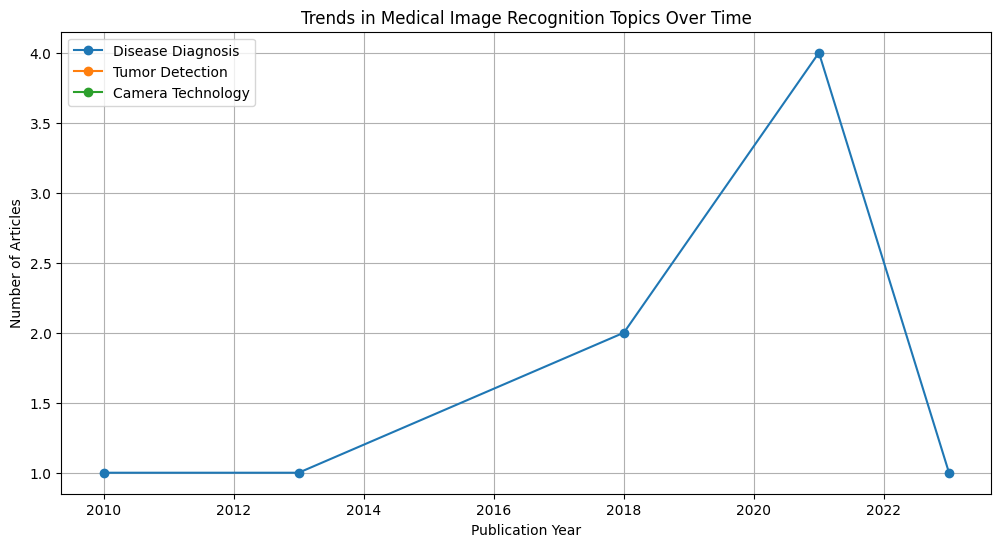

In [58]:
def primary_category(row):
    title = row['title_lower']
    summary = row['summary_lower']
    if 'disease diagnosis' in title or 'disease diagnosis' in summary:
        return 'Disease Diagnosis'
    elif 'tumor detection' in title or 'tumor detection' in summary:
        return 'Tumor Detection'
    elif 'camera technology' in title or 'camera technology' in summary:
        return 'Camera Technology'
    else:
        return 'Other'

# Apply the primary category function to create a 'topic' column
df_c['topic'] = df_c.apply(primary_category, axis=1)
df_c.loc[:, 'publication_year'] = pd.to_datetime(df_c['published']).dt.year

df_c.loc[:, 'title_lower'] = df_c['title'].str.lower()
df_c.loc[:, 'summary_lower'] = df_c['summary'].str.lower()

df_c.loc[:, 'Disease Diagnosis'] = df_c[['title_lower', 'summary_lower']].apply(lambda x: 'disease diagnosis' in ' '.join(x), axis=1)
df_c.loc[:, 'Tumor Detection'] = df_c[['title_lower', 'summary_lower']].apply(lambda x: 'tumor detection' in ' '.join(x), axis=1)
df_c.loc[:, 'Camera Technology'] = df_c[['title_lower', 'summary_lower']].apply(lambda x: 'camera technology' in ' '.join(x), axis=1)

diagnosis_trend = df_c[df_c['Disease Diagnosis']].groupby('publication_year').size()
tumor_trend = df_c[df_c['Tumor Detection']].groupby('publication_year').size()
camera_trend = df_c[df_c['Camera Technology']].groupby('publication_year').size()

plt.figure(figsize=(12, 6))
plt.plot(diagnosis_trend.index, diagnosis_trend.values, label='Disease Diagnosis', marker='o')
plt.plot(tumor_trend.index, tumor_trend.values, label='Tumor Detection', marker='o')
plt.plot(camera_trend.index, camera_trend.values, label='Camera Technology', marker='o')

plt.title('Trends in Medical Image Recognition Topics Over Time')
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.show()


In [22]:
field_counts = df['primary_category'].value_counts()

print(field_counts.head(10))  


primary_category
cs.AI    9280
cs.LO     104
cs.NE     104
cs.LG      86
cs.CL      52
cs.CV      52
cs.DB      47
cs.GT      26
cs.IR      25
cs.MA      23
Name: count, dtype: int64


##### find the yearly trend

In [24]:
yearly_trends = df_c['publication_year'].value_counts().sort_index()

print(yearly_trends)


publication_year
1993      6
1994      9
1995     24
1996     22
1997     15
1998     20
1999     17
2000     72
2001     40
2002     61
2003     76
2004    107
2005     84
2006     92
2007     92
2008    126
2009    197
2010    228
2011    458
2012    378
2013    805
2014    305
2015    249
2016    273
2017    474
2018    575
2019    406
2020    601
2021    795
2022    688
2023    460
Name: count, dtype: int64


In [25]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

keywords = ['medical image', 'recognition', 'AI', 'camera', 'computer vision', 'deep learning', 'medical imaging']

vectorizer = CountVectorizer(vocabulary=keywords, stop_words='english', lowercase=False)
X = vectorizer.fit_transform(df['title'] + ' ' + df['summary'])

# Phần còn lại tương tự
keywords_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
keyword_counts = keywords_df.sum().sort_values(ascending=False)
print(keyword_counts)



AI                 2694
recognition         524
camera               38
medical image         0
computer vision       0
deep learning         0
medical imaging       0
dtype: int64


# visualization

###### Prepare data

In [34]:
trend_data = df_c.groupby(['publication_year', 'topic']).size().reset_index(name='count')

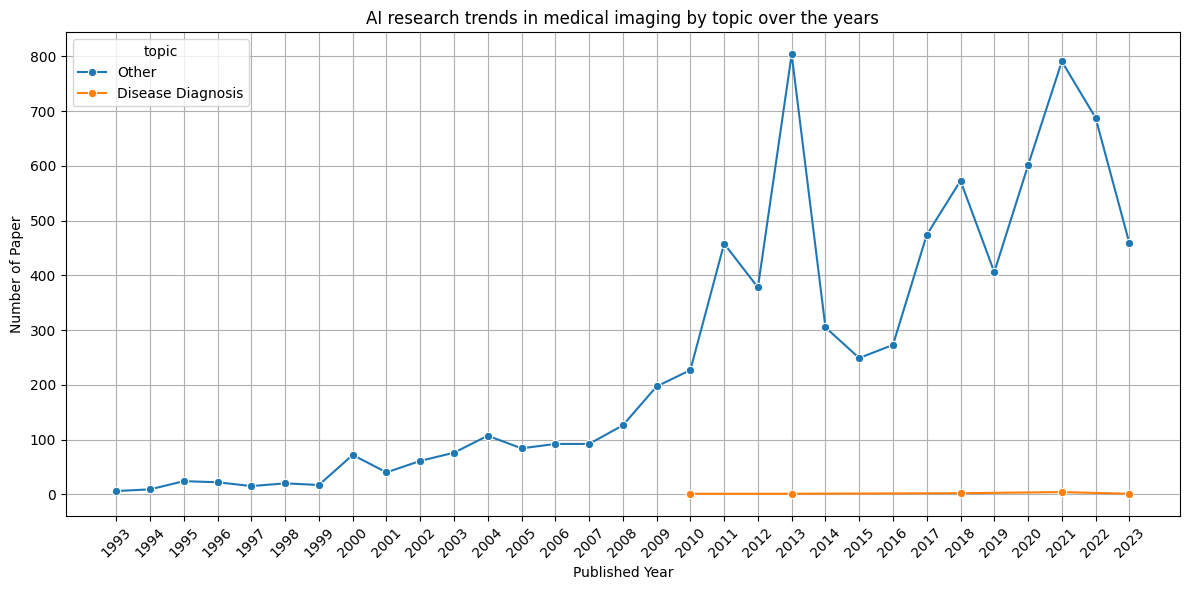

In [38]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='publication_year', y='count', hue='topic', marker='o')
plt.title('AI research trends in medical imaging by topic over the years')
plt.xlabel('Published Year')
plt.ylabel('Number of Paper')
plt.xticks(trend_data['publication_year'].unique(), rotation=45)
plt.legend(title='topic')
plt.grid()
plt.tight_layout()
plt.show()


# Model 

In [85]:
diagnosis_trend = df_c[df_c['Disease Diagnosis']].groupby('publication_year').size()


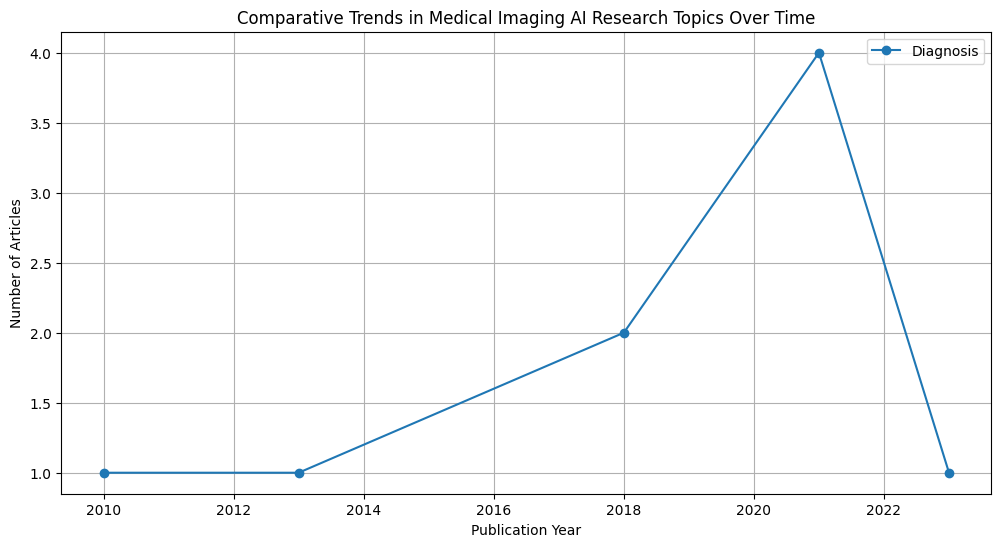

In [86]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(diagnosis_trend.index, diagnosis_trend.values, label='Diagnosis', marker='o')

plt.title('Comparative Trends in Medical Imaging AI Research Topics Over Time')
plt.xlabel('Publication Year')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid(True)
plt.show()


In [87]:
diagnosis_trend.index = pd.to_datetime(diagnosis_trend.index, format='%Y')
model = ARIMA(diagnosis_trend, order=(1, 1, 1)) 
model_fit = model.fit()

print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                    5
Model:                 ARIMA(1, 1, 1)   Log Likelihood                  -7.526
Date:                Mon, 28 Oct 2024   AIC                             21.053
Time:                        20:07:59   BIC                             19.212
Sample:                             0   HQIC                            17.012
                                  - 5                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1027      4.007      0.026      0.980      -7.751       7.957
ma.L1         -0.9977    679.283     -0.001      0.999   -1332.367    1330.372
sigma2         1.7604   1191.675      0.001      0.9

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting au

C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


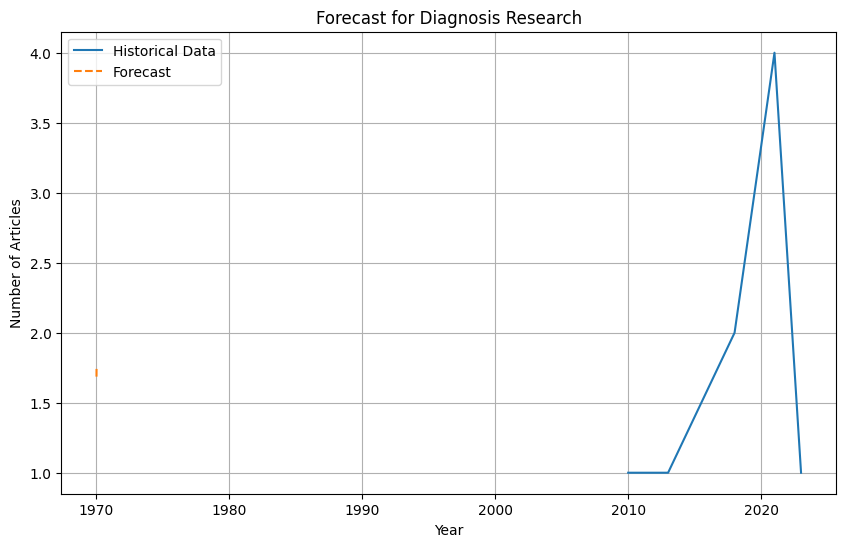

In [88]:
forecast_years = 5
forecast = model_fit.forecast(steps=forecast_years)

plt.figure(figsize=(10, 6))
plt.plot(diagnosis_trend, label='Historical Data')
plt.plot(forecast.index, forecast, label='Forecast', linestyle='--')
plt.title('Forecast for Diagnosis Research')
plt.xlabel('Year')
plt.ylabel('Number of Articles')
plt.legend()
plt.grid()
plt.show()
